In [43]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    })
plt.rcParams.update({'font.size': 14})

# zoom in box
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

# pandas
import pandas as pd

def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T

In [44]:
# Load Knee results
knee_df = pd.read_excel('Knee_results.xlsx')

knee_unet_8M = df2np(knee_df, 'U-Net-8M')
knee_unet_31M = df2np(knee_df, 'U-Net-31M')
knee_unet_124M = df2np(knee_df, 'U-Net-124M')

knee_vit_8Mp10 = df2np(knee_df, 'ViT-8M/10')
knee_vit_32Mp10 = df2np(knee_df, 'ViT-32M/10')

knee_train_data = [2, 17, 35]

# Load Brain results
brain_df = pd.read_excel('Brain_results.xlsx')

brain_unet_31M = df2np(brain_df, 'U-Net-31M')
brain_unet_124M = df2np(brain_df, 'U-Net-124M')

brain_vit_32Mp10 = df2np(brain_df, 'ViT-32M/10')
brain_vit_60Mp10 = df2np(brain_df, 'ViT-60M/10')

brain_train_data = [2, 35, 70]

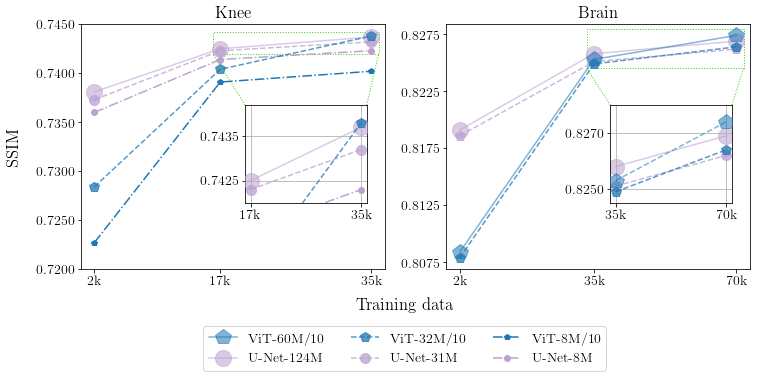

In [45]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(8*1.5, 3*1.5)

""" Plot Knee """
ms1 = 10
ms2 = 16
oc1 = 0.75
oc2 = 0.55
ax = axes[0]
ax.plot([], [], 'p-', markersize=ms2, alpha=oc2, color='#1f77b4', label='ViT-60M/10', zorder=6)
ax.plot(knee_train_data, knee_unet_124M, 'o-', markersize=ms2, alpha=oc2, color='#bca1d1', label='U-Net-124M', zorder=3)
ax.plot(knee_train_data, knee_vit_32Mp10, 'p--', markersize=ms1, alpha=oc1, color='#1f77b4', label='ViT-32M/10', zorder=5)
ax.plot(knee_train_data, knee_unet_31M, 'o--', markersize=ms1, alpha=oc1, color='#bca1d1', label='U-Net-31M', zorder=2)
ax.plot(knee_train_data, knee_vit_8Mp10, 'p-.', color='#1f77b4', label='ViT-8M/10', zorder=4)
ax.plot(knee_train_data, knee_unet_8M, 'o-.', color='#bca1d1', label='U-Net-8M', zorder=1)

ax.set_title('Knee')
ax.set_xticks(knee_train_data)
ax.set_xticklabels(['2k', '17k', '35k'])
ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# location for the zoomed portion 
axins = ax.inset_axes([.54, .27, .4, .4]) 

# plot the zoomed portion
axins.plot(knee_train_data[1:], knee_vit_32Mp10[1:], 'p--', markersize=ms1, alpha=oc1, color='#1f77b4', label='ViT-32M/10', zorder=4)
axins.plot(knee_train_data[1:], knee_unet_124M[1:], 'o-', markersize=ms2, alpha=oc2, color='#bca1d1', label='U-Net-124M', zorder=3)
axins.plot(knee_train_data[1:], knee_unet_31M[1:], 'o--', markersize=ms1, alpha=oc1, color='#bca1d1', label='U-Net-31M', zorder=2)
axins.plot(knee_train_data[1:], knee_unet_8M[1:],'o-.', color='#bca1d1', label='U-Net-8M', zorder=1)
axins.grid('on')
axins.set_xticks(knee_train_data[1:])
axins.set_xticklabels(['17k', '35k'])
axins.set_yticks([0.7425, 0.7435])
axins.set_ylim([0.7420, 0.7442])

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="#36d117", linestyle = 'dotted')

# legend handles
handles, labels = ax.get_legend_handles_labels()

""" Plot Brain """
ax = axes[1]
ax.plot(brain_train_data, brain_vit_60Mp10, 'p-', markersize=ms2, alpha=oc2, color='#1f77b4', label='ViT-60M/10', zorder=4)
ax.plot(brain_train_data, brain_unet_124M, 'o-', markersize=ms2, alpha=oc2, color='#bca1d1', label='U-Net-124M', zorder=2)
ax.plot(brain_train_data, brain_vit_32Mp10, 'p--', markersize=ms1, alpha=oc1, color='#1f77b4', label='ViT-32M/10', zorder=3)
ax.plot(brain_train_data, brain_unet_31M, 'p--', markersize=ms1, alpha=oc1, color='#bca1d1', label='U-Net-31M', zorder=1)
ax.set_title('Brain')
ax.set_xticks(brain_train_data)
ax.set_xticklabels(['2k', '35k', '70k'])
ax.yaxis.set_ticks(np.arange(0.8075, 0.8300, 0.005))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# location for the zoomed portion 
axins = ax.inset_axes([.54, .27, .4, .4]) 

# plot the zoomed portion
axins.plot(brain_train_data[1:], brain_vit_60Mp10[1:], 'p--', markersize=ms2, alpha=oc2,  color='#1f77b4', zorder=4)
axins.plot(brain_train_data[1:], brain_vit_32Mp10[1:], 'p--', markersize=ms1, alpha=oc1,  color='#1f77b4', zorder=3)
axins.plot(brain_train_data[1:], brain_unet_124M[1:], 'o-', markersize=ms2, alpha=oc2, color='#bca1d1', zorder=1)
axins.plot(brain_train_data[1:], brain_unet_31M[1:], 'o--', markersize=ms1, alpha=oc1,  color='#bca1d1', zorder=2)

axins.grid('on')
axins.set_xticks(brain_train_data[1:])
axins.set_xticklabels(['35k', '70k'])
axins.set_yticks([0.8250, 0.8270])
axins.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
axins.set_ylim([0.8245, 0.8280])

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="#36d117", linestyle = 'dotted')

## Add legend, axis labels
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.03), ncol=3, labelspacing=0.5)
fig.supxlabel('Training data', y=-0.01)
fig.supylabel('SSIM', x=0.04)

## Save
fig.savefig('sc4x_performance.pdf', format="pdf",transparent=True, bbox_inches = 'tight')